In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)
import shap
import optuna
from sklearn.inspection import permutation_importance

In [2]:
df_vegetables = pd.read_excel(
    '/Users/robert.bonnet/Documents/Notebooks/Sistema_de_equivalentes_mexicano_4_edici.xlsx',
    sheet_name='VERDURAS',
    header=2,
    usecols=['Proteina (g)', 'Lípidos (g)', 'Hidratos de carbono (g)', 'Fibra (g)', 'Indice glicémico']
    )

/Users/robert.bonnet/miniconda3/envs/insulin_period/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
df_vegetables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Proteina (g)             151 non-null    float64
 1   Lípidos (g)              151 non-null    float64
 2   Hidratos de carbono (g)  151 non-null    float64
 3   Fibra (g)                151 non-null    object 
 4   Indice glicémico         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [4]:
df_vegetables.columns = ['proteins_g', 'lipids_g', 'carbs_g', 'fiber', 'gi']

In [5]:
df_vegetables.replace('ND', np.nan, inplace=True)
df_vegetables.dropna(inplace=True)

/var/folders/25/79z98whn4_l7hqb5zl87zmyw0000gp/T/ipykernel_85908/2090033063.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_vegetables.replace('ND', np.nan, inplace=True)


In [6]:
df_vegetables

,proteins_g,lipids_g,carbs_g,fiber,gi
0,2.2,0.1,4.3,3.6,64.0
1,1.9,0.1,3.9,2.1,64.0
28,2.1,0.1,6.1,2.2,48.0
29,1.5,0.1,4.0,1.4,48.0
30,1.7,0.1,3.4,1.5,48.0
79,0.7,0.2,4.0,0.6,54.0
80,1.8,0.2,3.7,1.3,55.0
148,0.4,0.1,4.9,1.7,47.0
149,0.6,0.2,4.3,1.8,47.0
150,0.5,0.1,4.1,1.5,47.0


In [7]:
df_fruits = pd.read_excel(
    '/Users/robert.bonnet/Documents/Notebooks/Sistema_de_equivalentes_mexicano_4_edici.xlsx',
    sheet_name='FRUTAS',
    header=2,
    usecols=['Proteina (g)', 'Lípidos (g)', 'Hidratos de carbono (g)', 'Fibra (g)', 'indice glicémuco']
    )

/Users/robert.bonnet/miniconda3/envs/insulin_period/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [8]:
df_fruits.columns = ['proteins_g', 'lipids_g', 'carbs_g', 'fiber', 'gi']

In [9]:
df_fruits.replace('ND', np.nan, inplace=True)
df_fruits.dropna(inplace=True)

/var/folders/25/79z98whn4_l7hqb5zl87zmyw0000gp/T/ipykernel_85908/575526781.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fruits.replace('ND', np.nan, inplace=True)


In [10]:
df_fruits

,proteins_g,lipids_g,carbs_g,fiber,gi
17,0.9,0.2,14.7,2.1,22.0
21,1.8,0.5,14.0,2.5,57.0
24,0.3,0.8,14.9,4.0,40.0
27,1.1,0.4,18.1,2.2,39.0
29,0.5,0.1,15.7,1.7,29.0
36,0.3,0.0,12.4,1.1,103.0
37,1.4,0.2,14.6,2.3,42.0
44,1.4,0.6,15.7,4.1,40.0
50,1,0.4,14.9,1.3,38.0
65,0.6,0.2,11.9,1.8,61.0


In [11]:
df_cereals = pd.read_excel(
    '/Users/robert.bonnet/Documents/Notebooks/Sistema_de_equivalentes_mexicano_4_edici.xlsx',
    sheet_name='CEREALES SIN GRASA',
    header=2,
    usecols=['Proteina (g)', 'Lípidos (g)', 'Hidratos de carbono (g)', 'Fibra (g)', 'indice glicémuco']
    )

/Users/robert.bonnet/miniconda3/envs/insulin_period/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [12]:
df_cereals.columns = ['proteins_g', 'lipids_g', 'carbs_g', 'fiber', 'gi']

In [13]:
df_cereals.replace('ND', np.nan, inplace=True)
df_cereals.dropna(inplace=True)

/var/folders/25/79z98whn4_l7hqb5zl87zmyw0000gp/T/ipykernel_85908/4231551292.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cereals.replace('ND', np.nan, inplace=True)


In [14]:
df_cereals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 5 to 339
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   proteins_g  63 non-null     float64
 1   lipids_g    63 non-null     float64
 2   carbs_g     63 non-null     float64
 3   fiber       63 non-null     float64
 4   gi          63 non-null     float64
dtypes: float64(5)
memory usage: 3.0 KB


In [15]:
df_fat_cereals = pd.read_excel(
    '/Users/robert.bonnet/Documents/Notebooks/Sistema_de_equivalentes_mexicano_4_edici.xlsx',
    sheet_name='CEREALES CON GRASA',
    header=2,
    usecols=['Proteina (g)', 'Lípidos (g)', 'Hidratos de carbono (g)', 'Fibra (g)', 'indice glicémuco']
    )

/Users/robert.bonnet/miniconda3/envs/insulin_period/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [16]:
df_fat_cereals.columns = ['proteins_g', 'lipids_g', 'carbs_g', 'fiber', 'gi']

In [17]:
df_fat_cereals.replace('ND', np.nan, inplace=True)
df_fat_cereals.dropna(inplace=True)

/var/folders/25/79z98whn4_l7hqb5zl87zmyw0000gp/T/ipykernel_85908/921523163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fat_cereals.replace('ND', np.nan, inplace=True)


In [18]:
df_fat_cereals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 10 to 195
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   proteins_g  19 non-null     float64
 1   lipids_g    19 non-null     float64
 2   carbs_g     19 non-null     float64
 3   fiber       19 non-null     float64
 4   gi          19 non-null     float64
dtypes: float64(5)
memory usage: 912.0 bytes


In [19]:
df_legumes = pd.read_excel(
    '/Users/robert.bonnet/Documents/Notebooks/Sistema_de_equivalentes_mexicano_4_edici.xlsx',
    sheet_name='LEGUMINOSAS',
    header=2,
    usecols=['Proteina (g)', 'Lípidos (g)', 'Hidratos de carbono (g)', 'Fibra (g)', 'indice glicémuco']
    )

/Users/robert.bonnet/miniconda3/envs/insulin_period/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [20]:
df_legumes.columns = ['proteins_g', 'lipids_g', 'carbs_g', 'fiber', 'gi']

In [21]:
df_legumes.replace('ND', np.nan, inplace=True)
df_legumes.dropna(inplace=True)

/var/folders/25/79z98whn4_l7hqb5zl87zmyw0000gp/T/ipykernel_85908/2850125994.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_legumes.replace('ND', np.nan, inplace=True)


In [22]:
df_legumes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 33
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   proteins_g  10 non-null     float64
 1   lipids_g    10 non-null     float64
 2   carbs_g     10 non-null     float64
 3   fiber       10 non-null     float64
 4   gi          10 non-null     float64
dtypes: float64(5)
memory usage: 480.0 bytes


In [23]:
df_zero_milk = pd.read_excel(
    '/Users/robert.bonnet/Documents/Notebooks/Sistema_de_equivalentes_mexicano_4_edici.xlsx',
    sheet_name='LECHE DESCREMADA',
    header=2,
    usecols=['ALIMENTOS', 'Proteina (g)', 'Lípidos (g)', 'Hidratos de carbono (g)']
    )

/Users/robert.bonnet/miniconda3/envs/insulin_period/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [24]:
df_zero_milk.dropna(inplace=True)

In [25]:
df_zero_milk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ALIMENTOS                30 non-null     object 
 1   Proteina (g)             30 non-null     float64
 2   Lípidos (g)              30 non-null     float64
 3   Hidratos de carbono (g)  30 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.2+ KB


In [26]:
df_zero_milk

,ALIMENTOS,Proteina (g),Lípidos (g),Hidratos de carbono (g)
0,ALF** fresa con lactobacillus casei Shirota,6.4,0.3,17.1
1,ALF** mango con lactobacillus casei Shirota,6.4,0.3,16.9
2,ALF** manzana con lactobacillus casei Shirota,6.4,0.3,15.4
3,Leche Alpura Ligh Extra,8.0,2.4,14.0
4,Leche de soya,6.6,4.6,4.3
5,Leche descremada,8.4,0.4,11.9
6,Leche descremada con chocolate,5.8,1.0,12.5
7,Leche descremada en polvo,10.8,0.2,15.6
8,"Leche descremada en polvo, recucida en Ca",10.8,0.1,15.8
9,Leche en polvo descremada,10.8,0.2,15.6


In [27]:
df_zero_milk.drop([3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 26], inplace=True)

In [28]:
df_zero_milk['Fibra (g)'] = 0
df_zero_milk['GI'] = None

In [29]:
df_zero_milk.loc[0, 'GI'] = 46
df_zero_milk.loc[1, 'GI'] = 46
df_zero_milk.loc[2, 'GI'] = 46
df_zero_milk.loc[5, 'GI'] = 32
df_zero_milk.loc[6, 'GI'] = 34
df_zero_milk.loc[22, 'GI'] = 24
df_zero_milk.loc[23, 'GI'] = 24
df_zero_milk.loc[24, 'GI'] = 24
df_zero_milk.loc[27, 'GI'] = 24
df_zero_milk.loc[28, 'GI'] = 24
df_zero_milk.loc[29, 'GI'] = 24

In [30]:
df_zero_milk

,ALIMENTOS,Proteina (g),Lípidos (g),Hidratos de carbono (g),Fibra (g),GI
0,ALF** fresa con lactobacillus casei Shirota,6.4,0.3,17.1,0,46
1,ALF** mango con lactobacillus casei Shirota,6.4,0.3,16.9,0,46
2,ALF** manzana con lactobacillus casei Shirota,6.4,0.3,15.4,0,46
5,Leche descremada,8.4,0.4,11.9,0,32
6,Leche descremada con chocolate,5.8,1.0,12.5,0,34
22,Yoghur bajo en grasa,2.7,0.8,16.0,0,24
23,Yoghur Lala Light batido,7.3,0.4,14.4,0,24
24,Yoghur Lala Light bebible,7.3,0.5,13.0,0,24
27,Yoghur light,6.4,0.0,15.9,0,24
28,Yoghur light de fruta,5.3,0.0,16.9,0,24


In [31]:
df_zero_milk.drop('ALIMENTOS', axis=1, inplace=True)

In [32]:
df_zero_milk.columns = ['proteins_g', 'lipids_g', 'carbs_g', 'fiber', 'gi']

In [33]:
df_whole_milk = pd.read_excel(
    '/Users/robert.bonnet/Documents/Notebooks/Sistema_de_equivalentes_mexicano_4_edici.xlsx',
    sheet_name='LECHE ENTERA',
    header=2,
    usecols=['ALIMENTOS', 'Proteina (g)', 'Lípidos (g)', 'Hidratos de carbono (g)']
    )

/Users/robert.bonnet/miniconda3/envs/insulin_period/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [34]:
df_whole_milk.dropna(inplace=True)

In [35]:
df_whole_milk

,ALIMENTOS,Proteina (g),Lípidos (g),Hidratos de carbono (g)
0,Activia natural,5.6,5.9,14.9
1,Activia natural bebible,6.5,7.6,19.9
2,Activia natural sólido,5.6,5.9,14.9
3,Jocoque,7.0,9.6,2.9
4,Jcoque ligero,7.0,9.6,2.9
5,Jocoque seco,7.0,9.6,2.9
6,Leche,7.9,8.0,11.2
7,Leche caliente,7.9,8.0,11.2
8,Leche clavel,7.5,7.5,11.3
9,Leche cruda,7.9,7.9,11.3


In [36]:
df_whole_milk = df_whole_milk.iloc[[6, 12, 13, 14, 16, 17, 19, 32, 33, 34, 35]]

In [37]:
df_whole_milk

,ALIMENTOS,Proteina (g),Lípidos (g),Hidratos de carbono (g)
6,Leche,7.9,8.0,11.2
12,Leche de vaca,7.9,8.0,11.2
13,Leche en polvo,8.4,8.5,12.3
14,Leche entera,7.9,8.0,11.2
16,Leche entera en polvo,8.4,8.5,12.3
17,Leche entera en polvo adicionada,8.4,8.5,12.3
19,Leche entera ultrapasteurizada,7.0,7.0,11.3
32,Yoghur,7.9,7.4,10.6
33,Yoghur Lala batido,4.1,2.9,20.0
34,Yoghur Lala Vive con fibra,5.9,4.2,22.1


In [38]:
df_whole_milk['Fibra (g)'] = 0
df_whole_milk['GI'] = None

/var/folders/25/79z98whn4_l7hqb5zl87zmyw0000gp/T/ipykernel_85908/2328389658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whole_milk['Fibra (g)'] = 0
/var/folders/25/79z98whn4_l7hqb5zl87zmyw0000gp/T/ipykernel_85908/2328389658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whole_milk['GI'] = None


In [39]:
# Assign GI
df_whole_milk.loc[6, 'GI'] = 34
df_whole_milk.loc[12, 'GI'] = 34
df_whole_milk.loc[13, 'GI'] = 34
df_whole_milk.loc[14, 'GI'] = 34
df_whole_milk.loc[16, 'GI'] = 34
df_whole_milk.loc[17, 'GI'] = 34
df_whole_milk.loc[19, 'GI'] = 32
df_whole_milk.loc[32, 'GI'] = 36
df_whole_milk.loc[33, 'GI'] = 36
df_whole_milk.loc[34, 'GI'] = 36
df_whole_milk.loc[35, 'GI'] = 36

In [40]:
df_whole_milk.drop('ALIMENTOS', axis=1, inplace=True)

/var/folders/25/79z98whn4_l7hqb5zl87zmyw0000gp/T/ipykernel_85908/1941313188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whole_milk.drop('ALIMENTOS', axis=1, inplace=True)


In [41]:
df_whole_milk.columns = ['proteins_g', 'lipids_g', 'carbs_g', 'fiber', 'gi']

In [42]:
df_whole_milk

,proteins_g,lipids_g,carbs_g,fiber,gi
6,7.9,8.0,11.2,0,34
12,7.9,8.0,11.2,0,34
13,8.4,8.5,12.3,0,34
14,7.9,8.0,11.2,0,34
16,8.4,8.5,12.3,0,34
17,8.4,8.5,12.3,0,34
19,7.0,7.0,11.3,0,32
32,7.9,7.4,10.6,0,36
33,4.1,2.9,20.0,0,36
34,5.9,4.2,22.1,0,36


In [43]:
df_sugar_milk = pd.read_excel(
    '/Users/robert.bonnet/Documents/Notebooks/Sistema_de_equivalentes_mexicano_4_edici.xlsx',
    sheet_name='LECHE CON AZUCAR',
    header=2,
    usecols=['ALIMENTOS', 'Proteina (g)', 'Lípidos (g)', 'Hidratos de carbono (g)']
    )

/Users/robert.bonnet/miniconda3/envs/insulin_period/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [44]:
df_sugar_milk.dropna(inplace=True)

In [45]:
df_sugar_milk.head(60)

,ALIMENTOS,Proteina (g),Lípidos (g),Hidratos de carbono (g)
0,ALF* para beber fresa con Lactobacillus casei ...,6.2,3.2,32.3
1,ALF* para beber mango con Lactobacillus casei ...,6.2,0.4,31.4
2,ALF* para beber natural con Lactobacillus case...,6.0,1.3,26.4
3,Alimento lácteo fermentado con Actiregularis s...,5.8,6.8,31.7
4,Alimento lácteo fermentado con Actiregularis s...,6.2,6.4,30.9
5,Alimento lácteo fermentado con Actiregularis s...,5.8,6.8,32.0
6,Alimento lácteo fermentado con Actiregularis s...,7.0,6.4,25.5
7,Alimento lácteo fermentado sabor fresa (Lactob...,7.8,4.4,29.6
8,Alimento lácteo fermentado sabor manzana (Lac...,8.2,0.4,31.2
9,Alimento lácteo fermentado sabor natural (Lac...,8.6,0.4,31.0


In [46]:
df_sugar_milk = df_sugar_milk.iloc[[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]]

In [47]:
df_sugar_milk

,ALIMENTOS,Proteina (g),Lípidos (g),Hidratos de carbono (g)
12,Helado de café,3.4,10.0,25.5
13,Helado de café bajo en calorías,4.8,6.6,27.0
14,Helado de chocolate,3.8,10.9,27.9
15,Helado de chocolate bajo en calorías,5.0,7.1,28.7
16,Helado de fresa,3.2,8.3,27.3
17,Helado de fresa bajo en calorías,6.0,5.7,31.2
18,Helado de vainilla,3.5,10.9,23.4
19,Helado de vainilla bajo en calorías,6.3,6.4,34.1
20,Helado de yogur,4.8,5.7,34.2
21,Helado de yogur de fresa,4.8,5.7,34.2


In [48]:
df_sugar_milk['Fibra (g)'] = 0
df_sugar_milk['GI'] = 61

In [49]:
df_sugar_milk.drop('ALIMENTOS', axis=1, inplace=True)

In [50]:
df_sugar_milk.columns = ['proteins_g', 'lipids_g', 'carbs_g', 'fiber', 'gi']

In [51]:
df_sugar_milk

,proteins_g,lipids_g,carbs_g,fiber,gi
12,3.4,10.0,25.5,0,61
13,4.8,6.6,27.0,0,61
14,3.8,10.9,27.9,0,61
15,5.0,7.1,28.7,0,61
16,3.2,8.3,27.3,0,61
17,6.0,5.7,31.2,0,61
18,3.5,10.9,23.4,0,61
19,6.3,6.4,34.1,0,61
20,4.8,5.7,34.2,0,61
21,4.8,5.7,34.2,0,61


In [52]:
df_final = pd.concat([df_vegetables, df_fruits, df_cereals, df_fat_cereals, df_legumes, df_zero_milk, df_whole_milk, df_sugar_milk], axis=0)

In [53]:
df_final.reset_index(drop=True, inplace=True)

In [54]:
df_final['proteins_g'] = df_final['proteins_g'].astype(float)

In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   proteins_g  167 non-null    float64
 1   lipids_g    167 non-null    float64
 2   carbs_g     167 non-null    float64
 3   fiber       167 non-null    float64
 4   gi          167 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.6+ KB


In [56]:
df_final['release_time'] = df_final['gi'].apply(
    lambda x: 1 if x >= 70 else
              3 if x == 69 else
              6 if x == 68 else
              9 if x == 67 else
             12 if x == 66 else
             15 if x == 65 else
             18 if x == 64 else
             21 if x == 63 else
             24 if x == 62 else
             27 if x == 61 else
             30 if x == 60 else
             33 if x == 59 else
             36 if x == 58 else
             39 if x == 57 else
             42 if x == 56 else
             45 if x == 55 else
             48 if x == 54 else
             51 if x == 53 else
             54 if x == 52 else
             57 if x == 51 else
             60 if x == 50 else
             63 if x == 49 else
             66 if x == 48 else
             69 if x == 47 else
             72 if x == 46 else
             75 if x == 45 else
             78 if x == 44 else
             81 if x == 43 else
             84 if x == 42 else
             87 if x == 41 else
             90 if x == 40 else
             93 if x == 39 else
             96 if x == 38 else
             99 if x == 37 else
            102 if x == 36 else
            105 if x == 35 else
            108 if x == 34 else
            111 if x == 33 else
            114 if x == 32 else
            117 if x == 31 else
            120 if x <= 30 else
            None
)

In [57]:
df_final['gi'] = df_final['gi'].astype('Int64')

In [58]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   proteins_g    167 non-null    float64
 1   lipids_g      167 non-null    float64
 2   carbs_g       167 non-null    float64
 3   fiber         167 non-null    float64
 4   gi            167 non-null    Int64  
 5   release_time  167 non-null    int64  
dtypes: Int64(1), float64(4), int64(1)
memory usage: 8.1 KB


In [59]:
df_final.loc[122, 'gi'] = 76

In [60]:
df_final.tail(60)

,proteins_g,lipids_g,carbs_g,fiber,gi,release_time
107,1.0,4.9,10.7,0.3,76,1
108,0.8,5.3,8.3,0.0,64,18
109,0.8,5.3,8.3,0.0,64,18
110,1.3,4.5,15.0,0.3,59,33
111,2.2,3.1,19.0,1.2,49,63
112,2.6,2.8,18.0,1.7,60,30
113,2.5,3.6,13.2,1.4,54,48
114,2.2,3.1,19.0,1.2,49,63
115,2.6,2.8,18.0,1.7,60,30
116,1.1,6.9,9.2,0.6,76,1


In [61]:
df_final['gi'].max()

np.int64(103)

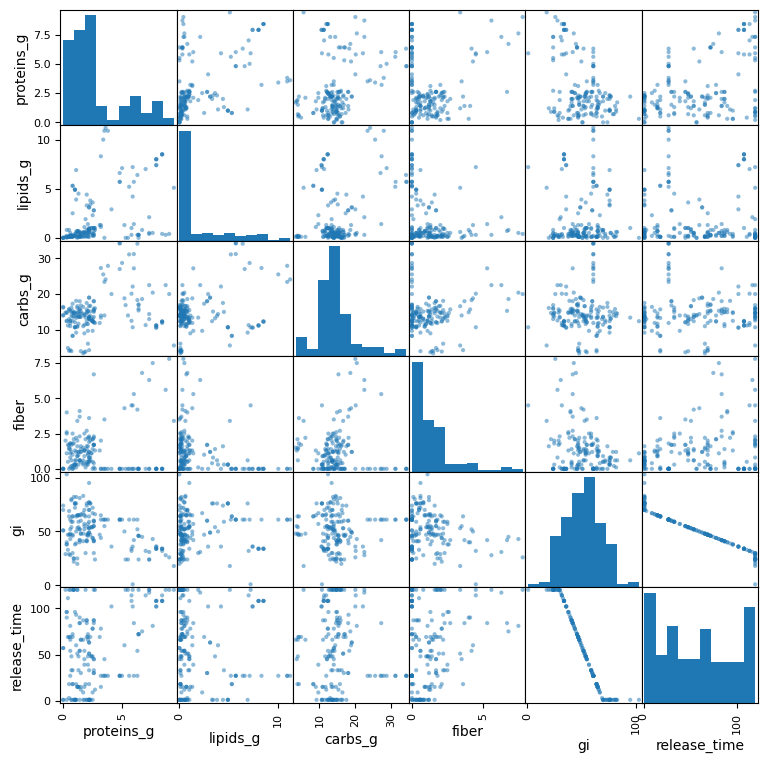

In [62]:
# Graph scatter matrix
pd.plotting.scatter_matrix(df_final, figsize=(9, 9))
plt.show()

# Features and Target Split

In [63]:
X = df_final.drop('release_time', axis=1)
y = df_final['release_time']

# Train and Test Split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)

# Scaling features

In [65]:
pt = PowerTransformer(method="yeo-johnson")
X_train_trans = pt.fit_transform(X_train)

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_trans)

In [67]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [68]:
# Transform and scale test features
X_test_trans = pt.transform(X_test)
X_test_scaled = scaler.transform(X_test_trans)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# DEF KFold Cross Validation

In [69]:
def kfold_cross_validation(model, X, y, k_folds=5):
    """
    Evaluates a model with K-fold Cross Validation and calculates the metrics: RMSE, MAE, MAPE, R2.

    Parameters:
    model: A Scikit-Learn or compatible machine learning model.
    X: The dataset characteristics.
    y: The target or label of the dataset.
    k_folds: Number of folds in K-fold cross validation.

    Returns:
    dict: A dictionary containing the model's performance metrics, including the confusion matrix.
    """
    # Initialize the StratifiedKFold object for stratified cross-validation
    cv = KFold(n_splits=k_folds, shuffle=True, random_state=12345)
    
    # Initialize lists to store metrics for each fold
    rmse_list = []
    mae_list = []
    mape_list = []
    r2_list = []

    # We perform cross-validation
    for train_index, valid_index in cv.split(X, y):
        # Split the data into training and validation sets
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict the target
        y_pred = model.predict(X_valid)
        
        # Calculate the metrics
        rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
        mae = mean_absolute_error(y_valid, y_pred)
        mape = mean_absolute_percentage_error(y_valid, y_pred)
        r2 = r2_score(y_valid, y_pred)
        
        rmse_list.append(rmse)
        mae_list.append(mae)
        mape_list.append(mape)
        r2_list.append(r2)

    # Calculation of loss function means
    metrics = {
        'RMSE': np.mean(rmse_list),
        'MAE': np.mean(mae_list),
        'MAPE': np.mean(mape_list),
        'R2': np.mean(r2_list)
    }
    
    return metrics

In [70]:
'''
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8)) #I add epsilon to avoid division by zero

def kfold_cross_validation(model, X, y, k_folds=5):
    """
    Evaluates a model with K-fold Cross Validation and calculates the metrics: RMSE, MAE, MAPE, R2.

    Parameters:
    model: A Scikit-Learn or compatible machine learning model.
    X: The dataset characteristics.
    y: The target or label of the dataset.
    k_folds: Number of folds in K-fold cross validation.

    Returns:
    dict: A dictionary containing the model's performance metrics, including the confusion matrix.
    """
    # Initialize the StratifiedKFold object for stratified cross-validation
    cv = KFold(n_splits=k_folds, shuffle=True, random_state=12345)
    
    # Initialize lists to store metrics for each fold
    rmse_list = []
    mae_list = []
    smape_list = []
    r2_list = []

    # We perform cross-validation
    for train_index, valid_index in cv.split(X, y):
        # Split the data into training and validation sets
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict the target
        y_pred = model.predict(X_valid)
        
        # Calculate the metrics
        rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
        mae = mean_absolute_error(y_valid, y_pred)
        smape_score = smape(y_valid, y_pred)
        r2 = r2_score(y_valid, y_pred)
        
        rmse_list.append(rmse)
        mae_list.append(mae)
        smape_list.append(smape_score)
        r2_list.append(r2)

    # Calculation of loss function means
    metrics = {
        'RMSE': np.mean(rmse_list),
        'MAE': np.mean(mae_list),
        'SMAPE': np.mean(smape_list),
        'R2': np.mean(r2_list)
    }
    
    return metrics
'''

'\ndef smape(y_true, y_pred):\n    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8)) #I add epsilon to avoid division by zero\n\ndef kfold_cross_validation(model, X, y, k_folds=5):\n    """\n    Evaluates a model with K-fold Cross Validation and calculates the metrics: RMSE, MAE, MAPE, R2.\n\n    Parameters:\n    model: A Scikit-Learn or compatible machine learning model.\n    X: The dataset characteristics.\n    y: The target or label of the dataset.\n    k_folds: Number of folds in K-fold cross validation.\n\n    Returns:\n    dict: A dictionary containing the model\'s performance metrics, including the confusion matrix.\n    """\n    # Initialize the StratifiedKFold object for stratified cross-validation\n    cv = KFold(n_splits=k_folds, shuffle=True, random_state=12345)\n    \n    # Initialize lists to store metrics for each fold\n    rmse_list = []\n    mae_list = []\n    smape_list = []\n    r2_list = []\n\n    # We perform cross-validat

# Linear Regression Model

In [71]:
lr_model = LinearRegression()

In [72]:
kfold_cross_validation(lr_model, X_train_scaled, y_train)

{'RMSE': np.float64(11.560683770452858),
 'MAE': np.float64(7.970931495400004),
 'MAPE': np.float64(1.9802345100852545),
 'R2': np.float64(0.9118598661863728)}

In [73]:
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

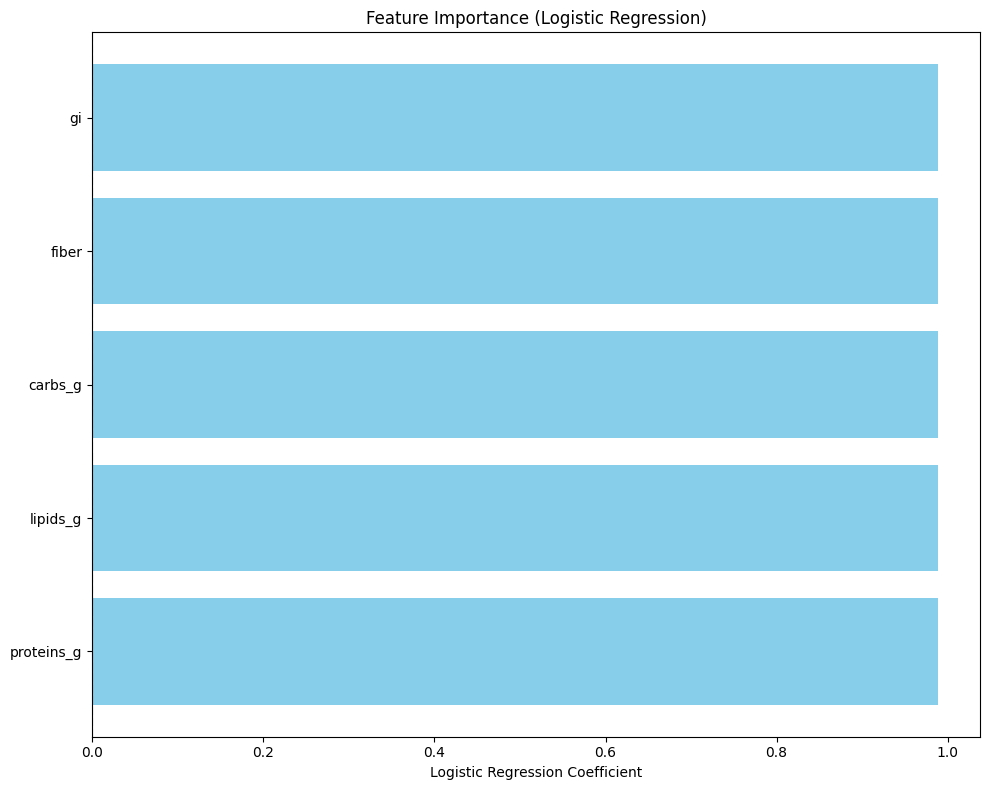

In [74]:
# Get the coefficients
coefficients = lr_model.coef_[0]  # shape: (n_features,)

# Get feature names
feature_names = X.columns  # or scaled_X_train.columns if you're using scaled data

# Create a pandas Series for easy sorting and labeling
coef_series = pd.Series(coefficients, index=feature_names)

# Sort the coefficients by absolute value (most important at the bottom)
sorted_coef = coef_series.reindex(coef_series.abs().sort_values().index)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_coef.index, sorted_coef.values, color='skyblue')
plt.axvline(x=0, color='gray', linestyle='--')  # optional: vertical line at 0
plt.xlabel("Logistic Regression Coefficient")
plt.title("Feature Importance (Logistic Regression)")
plt.tight_layout()
plt.show()


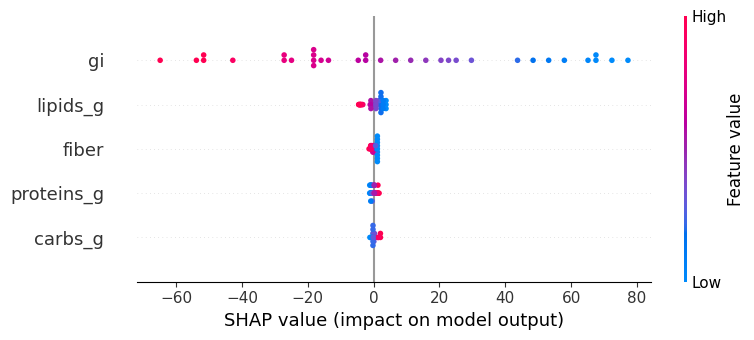

In [75]:
# Create the SHAP explainer object
lr_explainer = shap.LinearExplainer(lr_model, X_train_scaled)

# Calculate SHAP values for the test set
lr_shap_values = lr_explainer.shap_values(X_test_scaled)

# Summary plot for all test samples
shap.summary_plot(lr_shap_values, X_test_scaled)

# Random Forest Regression Model

In [76]:
# Objective function for Random Forest Regressor
def objective(trial, X, y, k_folds=5):
    """
    Objective function for Optuna to optimize hyperparameters of RandomForestRegressor.
    """

    # Suggest hyperparameters
    n_estimators = trial.suggest_categorical('n_estimators', [10, 50, 100, 200])
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Initialize model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=12345,
        n_jobs=-1
    )

    # K-Fold cross-validation
    cv = KFold(n_splits=k_folds, shuffle=True, random_state=12345)

    # Metrics collection
    mse_scores = []
    r2_scores = []

    for train_index, valid_index in cv.split(X):
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)

        mse_scores.append(mean_squared_error(y_valid, y_pred))
        r2_scores.append(r2_score(y_valid, y_pred))

    # Use average R2 score as the optimization target
    avg_r2 = np.mean(r2_scores)
    avg_mse = np.mean(mse_scores)

    # Return score to be maximized
    return avg_r2  # or: return -avg_mse (if minimizing)

# Create and run the Optuna study
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=12345))
study.optimize(lambda trial: objective(trial, X_train, y_train, k_folds=5), n_trials=30)

# Output best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best R2 score:", study.best_value)

[I 2025-09-28 11:41:16,118] A new study created in memory with name: no-name-113e2be7-dc50-44a3-9921-7ddf317129a5
[I 2025-09-28 11:41:16,281] Trial 0 finished with value: 0.7860631861292944 and parameters: {'n_estimators': 10, 'max_depth': 18, 'min_samples_split': 13, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.7860631861292944.
[I 2025-09-28 11:41:16,516] Trial 1 finished with value: 0.9984008333381047 and parameters: {'n_estimators': 50, 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9984008333381047.
[I 2025-09-28 11:41:17,017] Trial 2 finished with value: 0.9620811033260994 and parameters: {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 15, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.9984008333381047.
[I 2025-09-28 11:41:17,163] Trial 3 finished with value: 0.9620459482479641 and parameters: {'n_estimators': 10, 'max_depth': 23, 'min_samples_split': 20, 'min_samples_leaf': 14}. Best is trial 1 with va

Best hyperparameters: {'n_estimators': 50, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best R2 score: 0.9989939121480511


In [77]:
rfr_model = RandomForestRegressor(
        n_estimators=study.best_params['n_estimators'],
        max_depth=study.best_params['max_depth'],
        min_samples_split=study.best_params['min_samples_split'],
        min_samples_leaf=study.best_params['min_samples_leaf'],
        random_state=12345
    )

In [78]:
kfold_cross_validation(rfr_model, X_train, y_train)

{'RMSE': np.float64(1.239875221836923),
 'MAE': np.float64(0.7828319088319093),
 'MAPE': np.float64(0.03351140592121019),
 'R2': np.float64(0.9989939121480511)}

In [79]:
#Train the RFC model for the final evaluation
rfr_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=50, random_state=12345)

Text(0.5, 0, 'Random Forest Feature Importance')

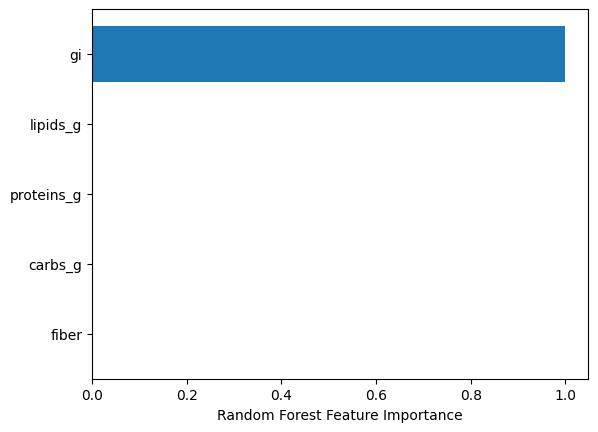

In [80]:
features_series = pd.Series(X.columns)
sorted_idx = rfr_model.feature_importances_.argsort()
plt.barh(features_series[sorted_idx], rfr_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance") 

Text(0.5, 0, 'Permutation Importance')

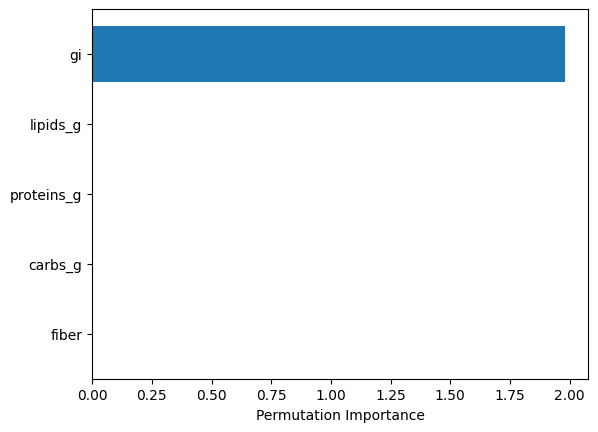

In [81]:
perm_importance = permutation_importance(rfr_model, X_train, y_train)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features_series[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

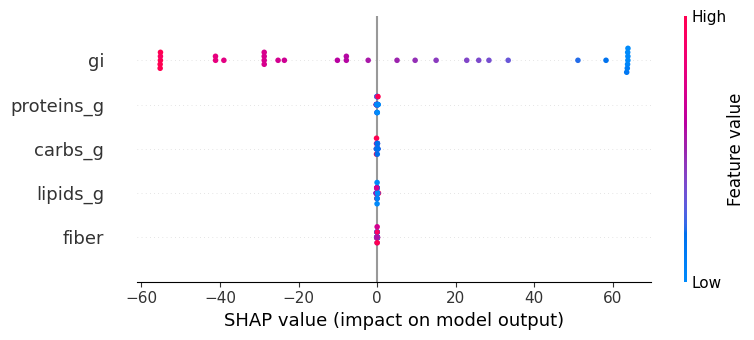

In [82]:
# Create SHAP TreeExplainer for the trained Random Forest Regressor model
rfr_explainer = shap.TreeExplainer(rfr_model)

# Generate SHAP values for the test set
rfr_shap_values = rfr_explainer.shap_values(X_test) # shape: (n_samples, n_features)

# Summary plot for the entire dataset
shap.summary_plot(rfr_shap_values, X_test)

# Light Gradient Boosting Machine Model

In [84]:
# Define the objective function for Optuna (LGBM Regressor)
def objective(trial, X, y, k_folds=5):
    """
    Objective function for Optuna to optimize hyperparameters of an LGBMRegressor based on regression metrics.
    """
    # Suggest hyperparameters
    n_estimators = trial.suggest_categorical('n_estimators', [50, 100, 200, 500])
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_child_samples = trial.suggest_int('min_child_samples', 5, 50)  # LightGBM equivalent of min_samples_leaf
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5, log=True)

    # Initialize the model
    model = LGBMRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_child_samples=min_child_samples,
        learning_rate=learning_rate,
        random_state=12345,
        n_jobs=-1
    )

    # KFold cross-validation
    cv = KFold(n_splits=k_folds, shuffle=True, random_state=12345)

    mse_scores = []
    r2_scores = []

    for train_idx, valid_idx in cv.split(X):
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)

        mse_scores.append(mean_squared_error(y_valid, y_pred))
        r2_scores.append(r2_score(y_valid, y_pred))

    avg_mse = np.mean(mse_scores)
    avg_r2 = np.mean(r2_scores)

    # Return the score to maximize (you could also minimize MSE if desired)
    return avg_r2

# Create the Optuna study
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=12345))

# Optimize the study
study.optimize(lambda trial: objective(trial, X_train, y_train, k_folds=5), n_trials=30)

# Show results
print("Best hyperparameters:", study.best_params)
print("Best R2 score:", study.best_value)

[I 2025-09-28 11:41:25,849] A new study created in memory with name: no-name-939478fd-b448-4e8d-96fe-4200c7a29d83
[I 2025-09-28 11:41:25,946] Trial 0 finished with value: 0.9354146765554537 and parameters: {'n_estimators': 50, 'max_depth': 18, 'min_child_samples': 32, 'learning_rate': 0.4351923352065246}. Best is trial 0 with value: 0.9354146765554537.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 106, number of used features: 5
[LightGBM] [Info] Start training from score 55.990566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-09-28 11:41:26,479] Trial 1 finished with value: 0.9509858846400043 and parameters: {'n_estimators': 100, 'max_depth': 29, 'min_child_samples': 5, 'learning_rate': 0.015165118322241595}. Best is trial 1 with value: 0.9509858846400043.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:26,828] Trial 2 finished with value: 0.907461106353152 and parameters: {'n_estimators': 500, 'max_depth': 30, 'min_child_samples': 38, 'learning_rate': 0.12346569647418434}. Best is trial 1 with value: 0.9509858846400043.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:26,881] Trial 3 finished with value: 0.7662558183899351 and parameters: {'n_estimators': 50, 'max_depth': 23, 'min_child_samples': 50, 'learning_rate': 0.14124989479647754}. Best is trial 1 with value: 0.9509858846400043.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 106, number of used features: 5
[LightGBM] [Info] Start training from score 57.481132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-09-28 11:41:29,132] Trial 4 finished with value: 0.9981307938694002 and parameters: {'n_estimators': 500, 'max_depth': 28, 'min_child_samples': 6, 'learning_rate': 0.06846426399341336}. Best is trial 4 with value: 0.9981307938694002.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 secon

[I 2025-09-28 11:41:29,482] Trial 5 finished with value: 0.8582125435485416 and parameters: {'n_estimators': 500, 'max_depth': 23, 'min_child_samples': 42, 'learning_rate': 0.0707723232638971}. Best is trial 4 with value: 0.9981307938694002.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 106, number of used features: 5
[LightGBM] [Info] Start training from score 55.990566
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-09-28 11:41:29,560] Trial 6 finished with value: 0.9729662611996552 and parameters: {'n_estimators': 50, 'max_depth': 16, 'min_child_samples': 26, 'learning_rate': 0.1604855128290227}. Best is trial 4 with value: 0.9981307938694002.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 106, number of used features: 5
[LightGBM] [Info] Start training from score 57.481132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-09-28 11:41:30,058] Trial 7 finished with value: 0.9357499493755755 and parameters: {'n_estimators': 500, 'max_depth': 28, 'min_child_samples': 33, 'learning_rate': 0.017995223816783285}. Best is trial 4 with value: 0.9981307938694002.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:30,896] Trial 8 finished with value: 0.9938709033055073 and parameters: {'n_estimators': 500, 'max_depth': 13, 'min_child_samples': 19, 'learning_rate': 0.09240269037909099}. Best is trial 4 with value: 0.9981307938694002.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 106, number of used features: 5
[LightGBM] [Info] Start training from score 55.9905

[I 2025-09-28 11:41:31,251] Trial 9 finished with value: 0.793463311316476 and parameters: {'n_estimators': 500, 'max_depth': 19, 'min_child_samples': 49, 'learning_rate': 0.11946463701878618}. Best is trial 4 with value: 0.9981307938694002.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:32,232] Trial 10 finished with value: 0.9977483692854916 and parameters: {'n_estimators': 200, 'max_depth': 6, 'min_child_samples': 5, 'learning_rate': 0.035046990174956126}. Best is trial 4 with value: 0.9981307938694002.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:32,685] Trial 11 finished with value: 0.9982596167143283 and parameters: {'n_estimators': 200, 'max_depth': 3, 'min_child_samples': 5, 'learning_rate': 0.030086846111099963}. Best is trial 11 with value: 0.9982596167143283.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:33,026] Trial 12 finished with value: 0.9960379878338939 and parameters: {'n_estimators': 200, 'max_depth': 3, 'min_child_samples': 15, 'learning_rate': 0.03655220219127939}. Best is trial 11 with value: 0.9982596167143283.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:33,484] Trial 13 finished with value: 0.997215723206023 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_child_samples': 12, 'learning_rate': 0.035797421196861696}. Best is trial 11 with value: 0.9982596167143283.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:33,724] Trial 14 finished with value: 0.8679438276266097 and parameters: {'n_estimators': 100, 'max_depth': 8, 'min_child_samples': 11, 'learning_rate': 0.01043161680872656}. Best is trial 11 with value: 0.9982596167143283.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:34,074] Trial 15 finished with value: 0.9836972314719177 and parameters: {'n_estimators': 200, 'max_depth': 24, 'min_child_samples': 23, 'learning_rate': 0.04828484606238999}. Best is trial 11 with value: 0.9982596167143283.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:34,640] Trial 16 finished with value: 0.9983755648677868 and parameters: {'n_estimators': 200, 'max_depth': 13, 'min_child_samples': 9, 'learning_rate': 0.025149106810433048}. Best is trial 16 with value: 0.9983755648677868.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:34,948] Trial 17 finished with value: 0.9933171009555124 and parameters: {'n_estimators': 200, 'max_depth': 3, 'min_child_samples': 18, 'learning_rate': 0.02158576328080392}. Best is trial 16 with value: 0.9983755648677868.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:35,454] Trial 18 finished with value: 0.9981176395570335 and parameters: {'n_estimators': 200, 'max_depth': 11, 'min_child_samples': 10, 'learning_rate': 0.025986358600074172}. Best is trial 16 with value: 0.9983755648677868.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:35,761] Trial 19 finished with value: 0.9676460508709137 and parameters: {'n_estimators': 200, 'max_depth': 14, 'min_child_samples': 21, 'learning_rate': 0.010696575425932692}. Best is trial 16 with value: 0.9983755648677868.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:36,150] Trial 20 finished with value: 0.9959201452677101 and parameters: {'n_estimators': 200, 'max_depth': 6, 'min_child_samples': 15, 'learning_rate': 0.053639540034562554}. Best is trial 16 with value: 0.9983755648677868.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:36,514] Trial 21 finished with value: 0.9982290372329368 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_child_samples': 8, 'learning_rate': 0.23688100950475077}. Best is trial 16 with value: 0.9983755648677868.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 107, number of used features: 5
[LightGBM] [Info] Start training from score 58.682243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-09-28 11:41:36,835] Trial 22 finished with value: 0.9983330062045217 and parameters: {'n_estimators': 100, 'max_depth': 21, 'min_child_samples': 9, 'learning_rate': 0.23398776417260245}. Best is trial 16 with value: 0.9983755648677868.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 107, number of used features: 5
[LightGBM] [Info] Start training from score 55.906542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-09-28 11:41:37,095] Trial 23 finished with value: 0.9957603188275479 and parameters: {'n_estimators': 100, 'max_depth': 25, 'min_child_samples': 15, 'learning_rate': 0.2696139140612291}. Best is trial 16 with value: 0.9983755648677868.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:37,395] Trial 24 finished with value: 0.9927242797265127 and parameters: {'n_estimators': 100, 'max_depth': 21, 'min_child_samples': 10, 'learning_rate': 0.026073755758056212}. Best is trial 16 with value: 0.9983755648677868.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:37,627] Trial 25 finished with value: 0.9962688621034056 and parameters: {'n_estimators': 100, 'max_depth': 15, 'min_child_samples': 13, 'learning_rate': 0.3602490033203293}. Best is trial 16 with value: 0.9983755648677868.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 107, number of used features: 5
[LightGBM] [Info] Start training from score 55.906542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-09-28 11:41:38,311] Trial 26 finished with value: 0.9964252579924782 and parameters: {'n_estimators': 200, 'max_depth': 12, 'min_child_samples': 8, 'learning_rate': 0.015747003469584606}. Best is trial 16 with value: 0.9983755648677868.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:38,560] Trial 27 finished with value: 0.9733271488495756 and parameters: {'n_estimators': 200, 'max_depth': 8, 'min_child_samples': 25, 'learning_rate': 0.20034362293735472}. Best is trial 16 with value: 0.9983755648677868.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-28 11:41:38,756] Trial 28 finished with value: 0.9584488456586515 and parameters: {'n_estimators': 100, 'max_depth': 16, 'min_child_samples': 30, 'learning_rate': 0.05054605906168648}. Best is trial 16 with value: 0.9983755648677868.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 secon

[I 2025-09-28 11:41:38,853] Trial 29 finished with value: 0.991627954605238 and parameters: {'n_estimators': 50, 'max_depth': 26, 'min_child_samples': 18, 'learning_rate': 0.4431581648443456}. Best is trial 16 with value: 0.9983755648677868.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 106, number of used features: 5
[LightGBM] [Info] Start training from score 57.481132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [86]:
lgb_model = LGBMRegressor(
        n_estimators=study.best_params['n_estimators'],
        max_depth=study.best_params['max_depth'],
        min_child_samples=study.best_params['min_child_samples'],
        learning_rate=study.best_params['learning_rate'],
        random_state=12345
    )

In [87]:
kfold_cross_validation(lgb_model, X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 106, number of used features: 5
[LightGBM] [Info] Start training from score 55.990566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

{'RMSE': np.float64(1.5788135343040985),
 'MAE': np.float64(1.1092313511551235),
 'MAPE': np.float64(0.11580011868602817),
 'R2': np.float64(0.9983755648677868)}

In [88]:
#Train the LGB model for the final evaluation
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 133, number of used features: 5
[LightGBM] [Info] Start training from score 57.060150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMRegressor(learning_rate=0.025149106810433048, max_depth=13,
              min_child_samples=9, n_estimators=200, random_state=12345)

Text(0.5, 0, 'Random Forest Feature Importance')

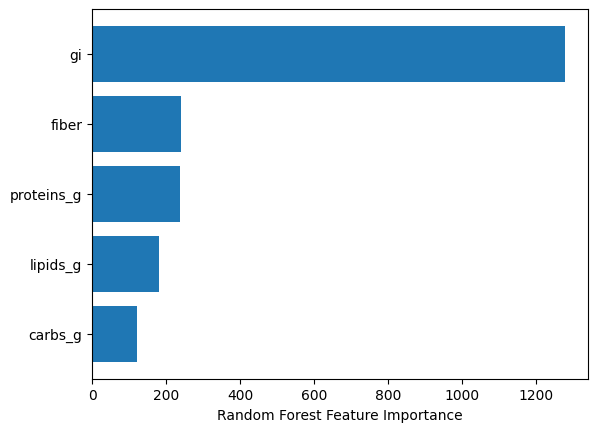

In [89]:
features_series = pd.Series(X.columns)
sorted_idx = lgb_model.feature_importances_.argsort()
plt.barh(features_series[sorted_idx], lgb_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Permutation Importance')

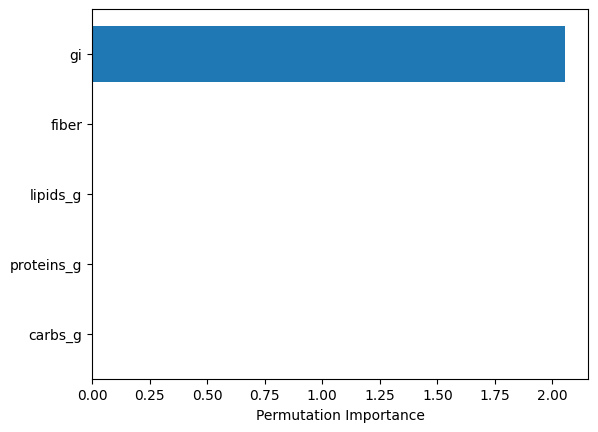

In [90]:
perm_importance = permutation_importance(lgb_model, X_train, y_train)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features_series[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

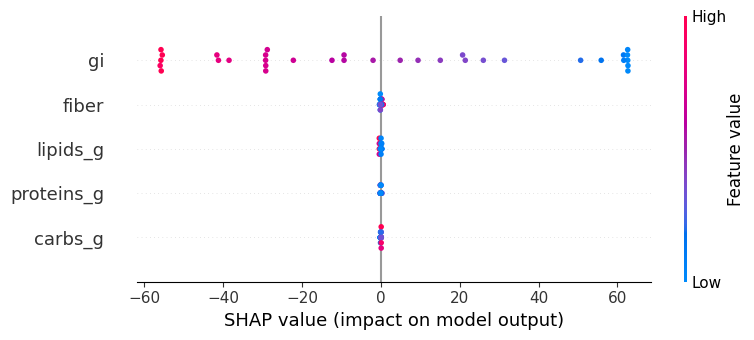

In [91]:
# Create SHAP explainer
lgb_explainer = shap.TreeExplainer(lgb_model)

# Calculate SHAP values for the test set
lgb_shap_values = lgb_explainer.shap_values(X_test)

shap.summary_plot(lgb_shap_values, X_test)

# Final evaluation of the models on the Test subsets

In [94]:
def test_evaluation_regression(model, X_test, y_test):
    """
    Evaluates a regression model on the final test set using metrics: MSE, MAE, R², and MAPE.

    Parameters:
    model: A trained regression model.
    X_test: The feature set for the test data.
    y_test: The true target values for the test data.

    Returns:
    dict: A dictionary containing regression performance metrics.
    """
    
    # Predict target values
    y_pred = model.predict(X_test)
    
    # Initialize metrics dictionary
    metrics = {}
    
    # Calculate regression metrics
    metrics['mse'] = mean_squared_error(y_test, y_pred)
    metrics['rmse'] = root_mean_squared_error(y_test, y_pred) # Substitutes mean_squared_error(y_test, y_pred, squared=False)
    metrics['mae'] = mean_absolute_error(y_test, y_pred)
    metrics['mape'] = mean_absolute_percentage_error(y_test, y_pred)
    metrics['r2'] = r2_score(y_test, y_pred)

    return metrics

In [96]:
print('Linear Regression Model Test Performance')
test_evaluation_regression(lr_model, X_test_scaled, y_test)

Linear Regression Model Test Performance


{'mse': 57.026600558103375,
 'rmse': 7.551595894782994,
 'mae': 6.426369317146187,
 'mape': 0.9412935499329812,
 'r2': 0.9690127017027415}

In [97]:
print('Random Forest Regressor Model Test Performance')
test_evaluation_regression(rfr_model, X_test, y_test)

Random Forest Regressor Model Test Performance


{'mse': 0.2701647058823524,
 'rmse': 0.519773706416891,
 'mae': 0.30941176470588233,
 'mape': 0.00784520020742931,
 'r2': 0.9998531970300064}

In [98]:
print('LGBM Regressor Model Test Performance')
test_evaluation_regression(lgb_model, X_test, y_test)

LGBM Regressor Model Test Performance


{'mse': 1.000397888620984,
 'rmse': 1.0001989245250087,
 'mae': 0.6960837283963341,
 'mape': 0.049622909003759236,
 'r2': 0.9994564005659243}